In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train= pd.read_csv('data/train.csv')
test= pd.read_csv('data/test.csv')

In [3]:

X= train.drop('label',axis=1)
y= train['label']


In [4]:
def display_image(X,i):    
    plt.imshow(np.matrix(X.iloc[i].values.reshape(28,28,1)))
    plt.show()

In [5]:

from sklearn.model_selection import train_test_split

train_x,val_x,train_y,val_y= train_test_split(X,y)

In [6]:

model= tf.keras.Sequential([
    Dense(units=32,input_shape=(784,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=10, activation='softmax')
])


In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
model.fit(x= train_x,y= train_y,validation_split=0.2,epochs=10)
model.evaluate(x= val_x,y= val_y)


Epoch 1/10
788/788 [==============================] - 3s 4ms/step - loss: 2.1206 - accuracy: 0.6367 - val_loss: 0.7140 - val_accuracy: 0.8110
Epoch 2/10
788/788 [==============================] - 2s 2ms/step - loss: 0.5474 - accuracy: 0.8471 - val_loss: 0.4822 - val_accuracy: 0.8684
Epoch 3/10
788/788 [==============================] - 2s 2ms/step - loss: 0.4161 - accuracy: 0.8839 - val_loss: 0.4408 - val_accuracy: 0.8833
Epoch 4/10
788/788 [==============================] - 2s 2ms/step - loss: 0.3677 - accuracy: 0.8957 - val_loss: 0.4045 - val_accuracy: 0.8914
Epoch 5/10
788/788 [==============================] - 2s 2ms/step - loss: 0.3127 - accuracy: 0.9098 - val_loss: 0.3912 - val_accuracy: 0.8986
Epoch 6/10
788/788 [==============================] - 2s 2ms/step - loss: 0.2955 - accuracy: 0.9153 - val_loss: 0.3696 - val_accuracy: 0.9013
Epoch 7/10
788/788 [==============================] - 1s 2ms/step - loss: 0.2610 - accuracy: 0.9246 - val_loss: 0.3207 - val_accuracy: 0.9148
Epoch 

[0.26436999440193176, 0.928857147693634]

In [9]:
answers= model.predict(val_x)
predictions= np.argmax(answers, axis=-1)

In [10]:
li=[]
for i in range(1000):
    if val_y.iloc[i] != predictions[i]:
        li.append(val_y.iloc[i])

In [11]:
li= pd.Series(li)

In [12]:
from sklearn.metrics import confusion_matrix

In [16]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 946    0    1    2    5   17    4    2   11    2]
 [   0 1177    4    5    2    1    1    1    6    0]
 [   4    6 1012   13   17    3    6   13   21    2]
 [   2    4   26  980    2   27    2    8   34    2]
 [   4    6    1    2  961    2    7    4    6   34]
 [   4   20    6   41    2  807   13    1   20    3]
 [   4    1    7    0    3   30  985    0   13    1]
 [   2   15   12    4    6    0    0 1012    3   19]
 [   0   13   15   26    3   13    1    1  975    6]
 [   7    6    1   22   23    8    2   21   27  898]]


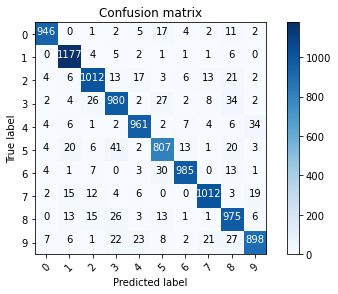

In [17]:
classes1=['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(confusion_matrix(y_true= val_y,y_pred= predictions),classes= classes1)